# Hard nonlinear complementarity problem with Billup's function

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demslv09.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>


## About

Solve hard nonlinear complementarity problem on R using semismooth and minmax methods.  Problem involves Billup's function.  Minmax formulation fails semismooth formulation suceeds.

The function to be solved is $$f(x) = 1.01 - (1- x)^2$$
where $x \geq 0$. Notice that $f(x)$ has roots $1\pm\sqrt{1.01}$

### Preliminary tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from compecon import MCP, tic, toc, nodeunif

### Billup's function roots are

In [2]:
roots = 1 + np.sqrt(1.01), 1 - np.sqrt(1.01)
print(roots)

(2.004987562112089, -0.00498756211208895)


### Set up the problem
The class **MCP** is used to represent mixed-complementarity problems. To create one instance, we define the objective function and the boundaries $a$ and $b$ such that for $a \leq x \leq b$

In [3]:
def billups(x):
    fval = 1.01 - (1 - x) ** 2
    return fval, 2*(1 - x )

a = 0
b = np.inf

Billups = MCP(billups, a, b)

### Solve by applying Newton method
* Using minmax formulation
Initial guess is $x=0$

In [4]:
t1 = tic()
x1 = Billups.zero(0.0, transform='minmax')
t1 = 100*toc(t1)

* Using semismooth formulation

In [5]:
t2 = tic()
x2 = Billups.zero(0.0, transform='ssmooth')
t2 = 100*toc(t2)

### Print results
Hundreds of seconds required to solve hard nonlinear complementarity problem using Newton minmax and semismooth formulations

In [6]:
frm = '{:17} {:6.3f} {:8.1e} {:>10.6f}'
prt = lambda d, t,x: print(frm.format(d, t,norm(Billups.minmax(x)), *x))

print('{:17} {:^6} {:^8} {:^10}'.format('Algorithm','Time','Norm','x'))
print('-' * 44)
prt('Newton minmax', t1, x1)
prt('Newton semismooth', t2, x2)

Algorithm          Time    Norm       x     
--------------------------------------------
Newton minmax      6.287  1.0e-02   0.000000
Newton semismooth 11.270  1.0e-02   0.000000


### Plot results
Here we use the methods *ssmooth* and *minmax* from class **MCP** to compute the semi-smooth and minimax transformations. 

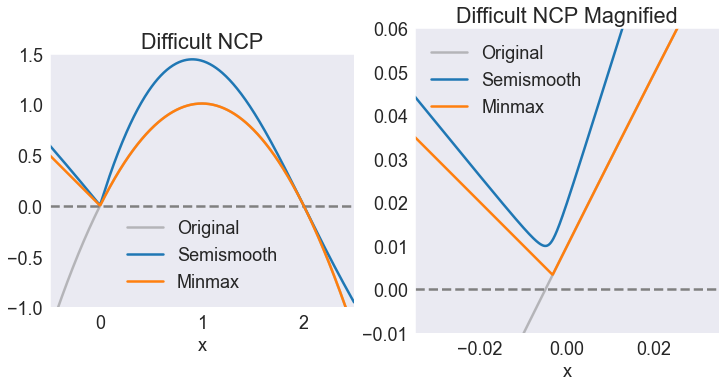

In [7]:
original = {'label':'Original', 'alpha':0.5, 'color':'gray'}
xls = [[-0.5, 2.5], [-0.035, 0.035]]
yls = [[-1, 1.5], [-0.01, 0.06]]
ttls = 'Difficult NCP', 'Difficult NCP Magnified'

fig, axs = plt.subplots(1, 2, figsize=[12,6])
for xl, yl, ttl, ax in zip(xls, yls, ttls, axs):
    a, b = xl
    x = np.linspace(a, b, 500)
    ax.set(title=ttl,
           xlabel='x',
           ylabel='',
           xlim=xl,
           ylim=yl,
           aspect=1)
    ax.hlines(0, a, b, 'gray', '--')
    ax.plot(x, billups(x)[0], **original)
    ax.plot(x, Billups.ssmooth(x), label='Semismooth')
    ax.plot(x, Billups.minmax(x), label='Minmax')
    ax.legend(loc='best')